# To generate the plots

In [15]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

folder_plots = ""

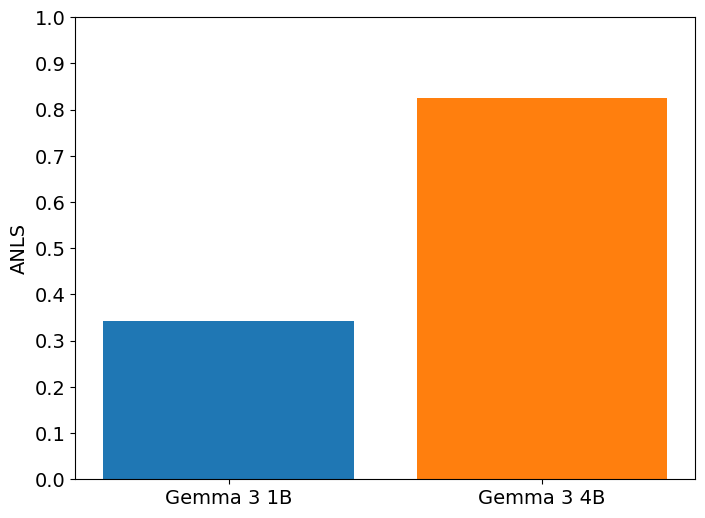

In [16]:
# For the gemma 3 comparison size
categories = ['Gemma 3 1B', 'Gemma 3 4B']
anls_1B = np.array([0.455,0.154,0.605, 0.154])
anls_4B = np.array([0.789, 0.721, 0.939, 0.852])
values = [anls_1B.mean(), anls_4B.mean()]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['tab:blue', 'tab:orange'])
# for i, v in enumerate(values):
#     plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=20)

plt.xticks(fontsize=14)
plt.ylabel('ANLS', fontsize=14)
#plt.title('Comparison of ANLS over the model size')
plt.ylim([0, 1])
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)

plt.savefig(f"{folder_plots}gemma_size_comparison_meta.pdf")
plt.show()

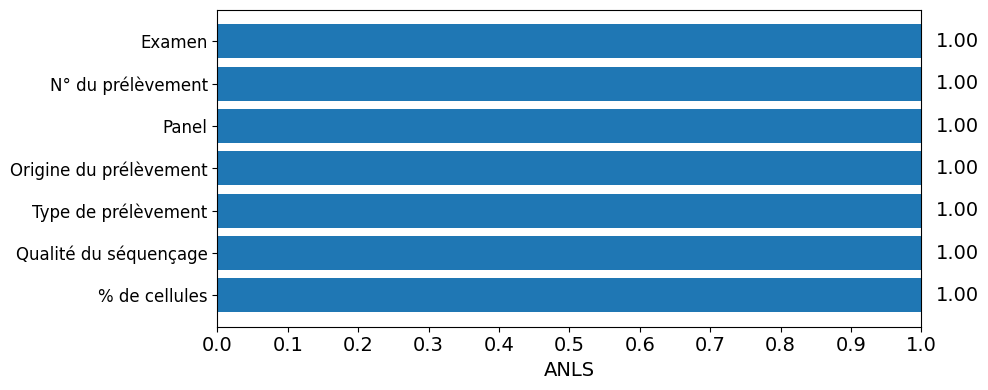

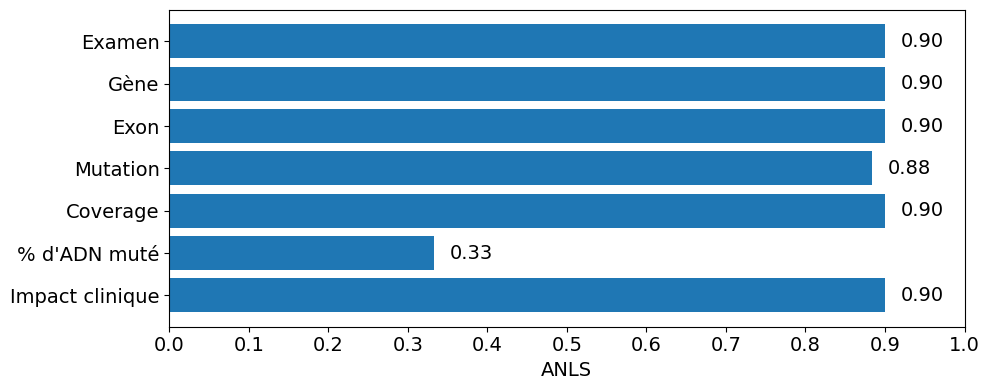

In [17]:
# for the handcrafted baseline
categories_meta = ["Examen", "N° du prélèvement", "Panel", "Origine du prélèvement", "Type de prélèvement", "Qualité du séquençage", "% de cellules"][::-1]
values_meta = [1, 1, 1, 1, 1, 1, 1][::-1]

plt.figure(figsize=(10, 4))

plt.barh(categories_meta, values_meta, color='tab:blue')
for i, v in enumerate(values_meta):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=14)

plt.xlabel('ANLS', fontsize=14)  # Label for x-axis (since bars are horizontal)
plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.xlim([0, 1])

plt.tight_layout()
plt.savefig(f"{folder_plots}handcrafted_baseline_meta.pdf")
plt.show()

categories_mut = ["Examen", "Gène", "Exon", "Mutation", "Coverage", "% d'ADN muté", "Impact clinique"][::-1]
values_mut = np.array([1, 1, 1, 0.982, 1, 0.370, 1][::-1]) * 18/20

plt.figure(figsize=(10, 4))

plt.barh(categories_mut, values_mut, color='tab:blue')
for i, v in enumerate(values_mut):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=14)

plt.xlabel('ANLS', fontsize=14)  # Label for x-axis (since bars are horizontal)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.xlim([0, 1])

plt.tight_layout()
plt.savefig(f"{folder_plots}handcrafted_baseline_mut.pdf")
plt.show()

## Camembert model

Average ANLS for Camembert model: 0.6208571428571429


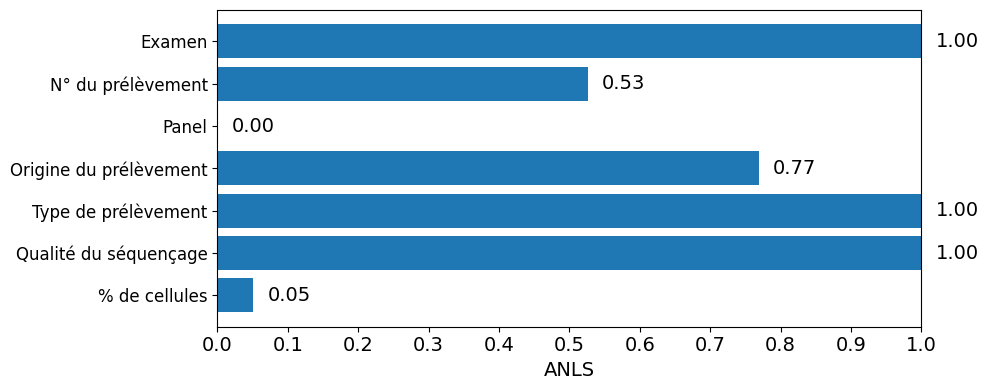

In [18]:
# for the camembert model

categories_meta = ["Examen", "N° du prélèvement", "Panel", "Origine du prélèvement", "Type de prélèvement", "Qualité du séquençage", "% de cellules"][::-1]

values_meta = np.array([1.0, 0.526, 0.0, 0.769, 1.0, 1.0, 0.051][::-1])

plt.figure(figsize=(10, 4))

plt.barh(categories_meta, values_meta, color='tab:blue')
for i, v in enumerate(values_meta):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=14)

plt.xlabel('ANLS', fontsize=14)  # Label for x-axis (since bars are horizontal)
plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.xlim([0, 1])

print("Average ANLS for Camembert model:", values_meta.mean())
plt.tight_layout()
plt.savefig(f"{folder_plots}camembert_meta.pdf")
plt.show()

## LLM pipeline

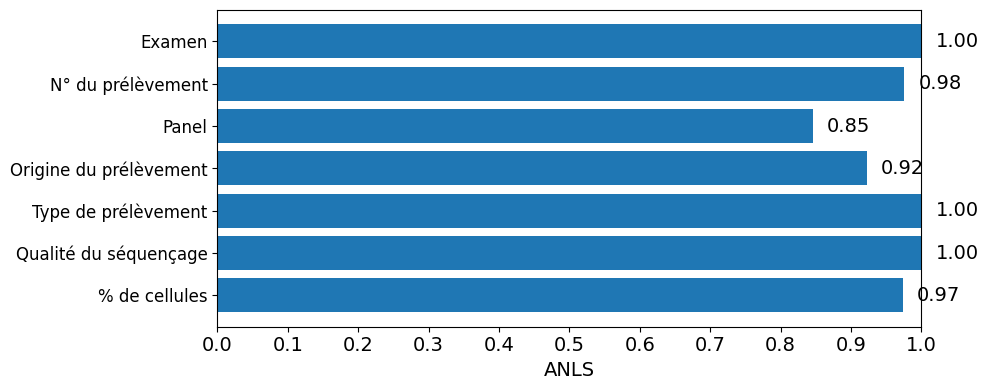

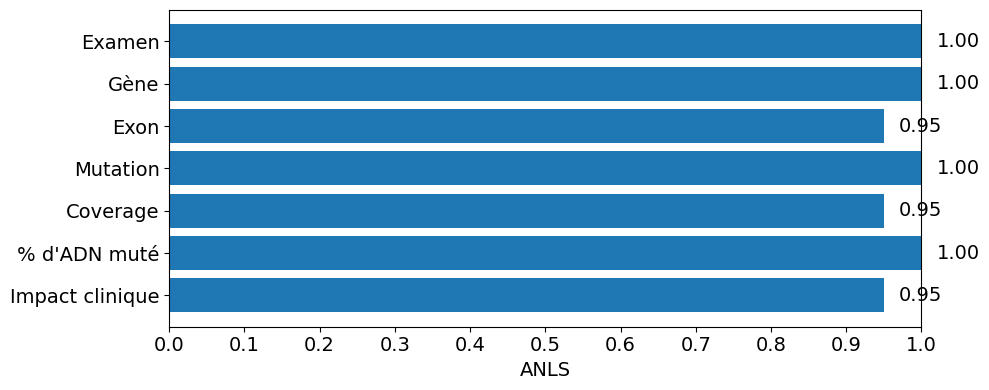

In [19]:
categories_meta = ["Examen", "N° du prélèvement", "Panel", "Origine du prélèvement", "Type de prélèvement", "Qualité du séquençage", "% de cellules"][::-1]

values_meta = np.array([1.0, 0.976, 0.846, 0.923, 1.0, 1.0, 0.974][::-1])

plt.figure(figsize=(10, 4))

plt.barh(categories_meta, values_meta, color='tab:blue')
for i, v in enumerate(values_meta):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=14)

plt.xlabel('ANLS', fontsize=14)  # Label for x-axis (since bars are horizontal)
plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.xlim([0, 1])

plt.tight_layout()
plt.savefig(f"{folder_plots}llm_pipeline_meta.pdf")
plt.show()

categories_mut = ["Examen", "Gène", "Exon", "Mutation", "Coverage", "% d'ADN muté", "Impact clinique"][::-1]
values_mut = np.array([1.0, 1.0, 0.95, 1.0, 0.95, 1.0, 0.95][::-1])
plt.figure(figsize=(10, 4))

plt.barh(categories_mut, values_mut, color='tab:blue')
for i, v in enumerate(values_mut):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=14)

plt.xlabel('ANLS', fontsize=14)  # Label for x-axis (since bars are horizontal)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.xlim([0, 1])

plt.tight_layout()
plt.savefig(f"{folder_plots}llm_pipeline_mut.pdf")
plt.show()


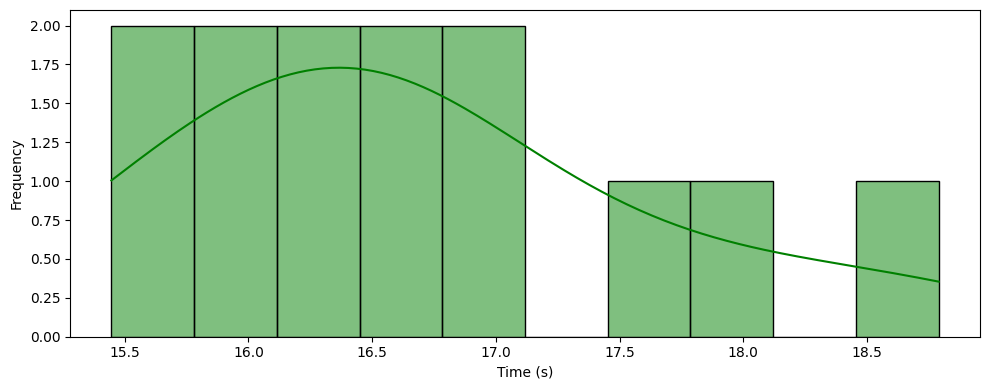

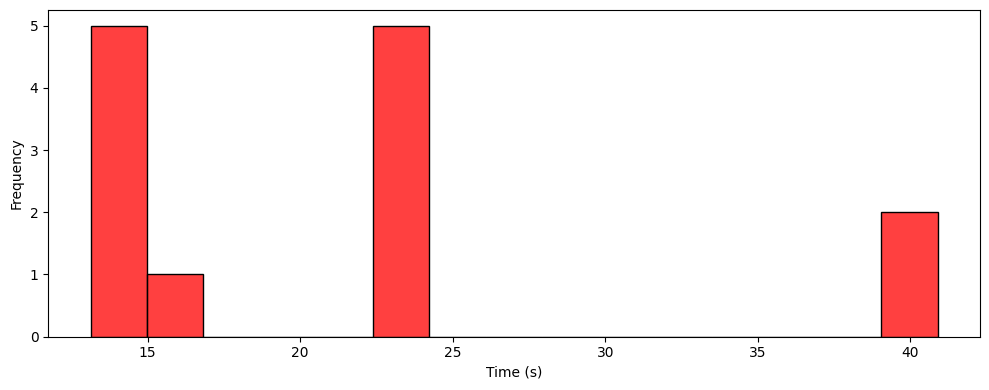

In [20]:
# histogram of the time taken by pipeline
import pandas as pd
import seaborn as sns

time_data_path = '../out/times_gemma3_4B.xlsx'
time_data = pd.read_excel(time_data_path)

plt.figure(figsize=(10, 4))
sns.histplot(time_data['Time_Metadata'], bins=10, kde=True, color="green")
plt.xlabel('Time (s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig(f"{folder_plots}time_distribution_meta.pdf")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(time_data['Time_Mutation'], bins=15, kde=False, color="red")
plt.xlabel('Time (s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig(f"{folder_plots}time_distribution_mut.pdf")
plt.show()